# Part 1

In [1]:
import json
from pprint import pprint
data = json.load(open('reduced_dblp.json')) # Loading the json file

In [2]:
publications = {}
for i in range(len(data)):
    lst = []
    for j in data[i]['authors']:
        lst.append(j['author_id'])
    publications[data[i]['id_publication_int']] = lst

In [3]:
from collections import defaultdict
authors = defaultdict(list)

for key, values in publications.items():
    for value in values:
        authors[value].append(key)

In [4]:
def jaccard_distance(list1, list2):
    # The function to calculate the weights
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(list1) + len(list2)) - intersection
    if int(union)==0:
        return 0
    return 1-float(intersection / union)

In [5]:
import itertools
import networkx as nx
graph = nx.Graph()

for pub, aut in publications.items():
    if len(aut)>1:
        combos = list(itertools.combinations(aut,2))
        for names in combos:
            graph.add_edge(names[0], names[1], weight = jaccard_distance(authors[names[0]], authors[names[1]]))
    else:
        graph.add_node(aut[0])

In [6]:
print(nx.info(graph))

Name: 
Type: Graph
Number of nodes: 7771
Number of edges: 16489
Average degree:   4.2437


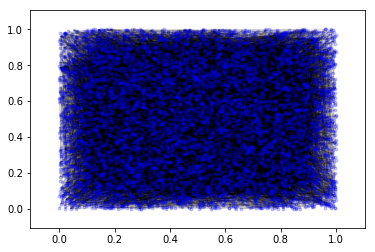

In [21]:
from pylab import show
# create the layout
pos = nx.random_layout(graph)
# draw the nodes and the edges (all)
nx.draw_networkx_nodes(graph,pos,node_color='b',alpha=0.2,node_size=8)
nx.draw_networkx_edges(graph,pos,alpha=0.1)

# draw the most important nodes with a different style
#nx.draw_networkx_nodes(Gt,pos,node_color='r',alpha=0.4,node_size=254)
# also the labels this time
#nx.draw_networkx_labels(Gt,pos,font_size=12,font_color='b')
show()

# Part 2a

In [7]:
conference=input("Enter the conference_id:")

Enter the conference_id:3052


In [8]:
data[0]

{'authors': [{'author': 'h&eacute;lio marcos paz de almeida',
   'author_id': 255206},
  {'author': 'dorgival olavo guedes neto', 'author_id': 255207},
  {'author': 'wagner meira jr.', 'author_id': 16585},
  {'author': 'mohammed j. zaki', 'author_id': 255208}],
 'id_conference': 'conf/pkdd/2011-1',
 'id_conference_int': 3052,
 'id_publication': 'conf/pkdd/almeidanmz11',
 'id_publication_int': 161535,
 'title': 'is there a best quality metric for graph clusters?'}

In [9]:
graph.nodes(data=True)

[(255206, {}),
 (255207, {}),
 (16585, {}),
 (255208, {}),
 (255280, {}),
 (255281, {}),
 (3326, {}),
 (20405, {}),
 (20407, {}),
 (255339, {}),
 (205380, {}),
 (115228, {}),
 (210891, {}),
 (255394, {}),
 (255395, {}),
 (255405, {}),
 (9308, {}),
 (175195, {}),
 (17178, {}),
 (176994, {}),
 (73799, {}),
 (24151, {}),
 (255487, {}),
 (255488, {}),
 (3476, {}),
 (255489, {}),
 (166813, {}),
 (13781, {}),
 (9741, {}),
 (8757, {}),
 (255537, {}),
 (21462, {}),
 (255578, {}),
 (113776, {}),
 (255247, {}),
 (82068, {}),
 (255673, {}),
 (255688, {}),
 (255689, {}),
 (255690, {}),
 (255691, {}),
 (113346, {}),
 (15924, {}),
 (255814, {}),
 (200773, {}),
 (93126, {}),
 (23845, {}),
 (208589, {}),
 (127810, {}),
 (255902, {}),
 (255926, {}),
 (9503, {}),
 (9505, {}),
 (9068, {}),
 (9046, {}),
 (9069, {}),
 (9070, {}),
 (255950, {}),
 (255996, {}),
 (20199, {}),
 (124828, {}),
 (239007, {}),
 (189237, {}),
 (255823, {}),
 (256123, {}),
 (256124, {}),
 (8985, {}),
 (8987, {}),
 (8988, {}),
 (1928

In [10]:
authors_list=[]
c=int(conference)
for instance in data:
    current_c=int(instance['id_conference_int'])
    if current_c == c:
        for a in instance['authors']:
            if a['author_id'] not in authors_list:
                authors_list.append(a['author_id'])
    
print(authors_list)

[255206, 255207, 16585, 255208, 255280, 255281, 3326, 20405, 20407, 255339, 205380, 115228, 210891, 255394, 255395, 255405, 9308, 175195, 17178, 176994, 73799, 24151, 255487, 255488, 3476, 255489, 166813, 13781, 9741, 8757, 255537, 21462, 255578, 113776, 255247, 82068, 255673, 255688, 255689, 255690, 255691, 113346, 15924, 255814, 200773, 93126, 23845, 208589, 127810, 255902, 255926, 9503, 9505, 9068, 9046, 9069, 9070, 255950, 255996, 20199, 124828, 239007, 189237, 255823, 256123, 256124, 8985, 8987, 8988, 19285, 19460, 8612, 255494, 256146, 256147, 9771, 256148, 20336, 256176, 256177, 255328, 256188, 256159, 256133, 256264, 256265, 256276, 25696, 255805, 72882, 72883, 71582, 71969, 9772, 114626, 114625, 114483, 202882, 256135, 252278, 83637, 83639, 255300, 21056, 70758, 256482, 256500, 20392, 8857, 256366, 255759, 255760, 8874, 19794, 9451, 8350, 8352, 151570, 43462, 9388]


In [15]:
H = graph.subgraph(authors_list)
print(nx.info(H))

Name: 
Type: Graph
Number of nodes: 120
Number of edges: 117
Average degree:   1.9500


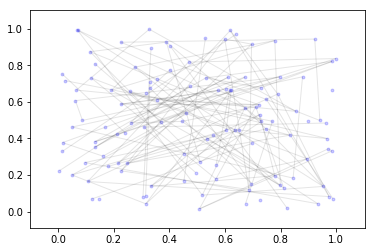

In [22]:
from pylab import show
# create the layout
pos = nx.random_layout(H)
# draw the nodes and the edges (all)
nx.draw_networkx_nodes(H,pos,node_color='b',alpha=0.2,node_size=8)
nx.draw_networkx_edges(H,pos,alpha=0.1)
show()

In [23]:
list_names={}
for instance in data:
    for a in instance['authors']:
        if int(conference)==int(instance['id_conference_int']):
            
            times=list_names.get(a['author'], 0)
            times+=1
            if times !=0:
                list_names[a['author']]=times
            else:
                continue

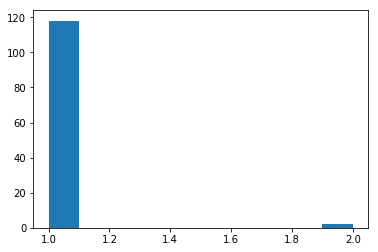

In [24]:
plt.figure()
plt.hist(list(list_names.values()))
plt.show()

In [27]:
# DEGREE CENTRALITY

In [51]:
degree_centrality={}
n=len(H)
for each in H:
    degree_centrality[each]=len(H.edges(each))/(n-1)
print(degree_centrality)

{255206: 0.025210084033613446, 255207: 0.025210084033613446, 16585: 0.025210084033613446, 255208: 0.025210084033613446, 255280: 0.01680672268907563, 255281: 0.01680672268907563, 3326: 0.01680672268907563, 20405: 0.008403361344537815, 20407: 0.008403361344537815, 255339: 0.01680672268907563, 205380: 0.01680672268907563, 115228: 0.01680672268907563, 210891: 0.01680672268907563, 255394: 0.01680672268907563, 255395: 0.01680672268907563, 255405: 0.025210084033613446, 9308: 0.025210084033613446, 175195: 0.025210084033613446, 17178: 0.025210084033613446, 176994: 0.01680672268907563, 73799: 0.01680672268907563, 24151: 0.01680672268907563, 255487: 0.025210084033613446, 255488: 0.025210084033613446, 3476: 0.025210084033613446, 255489: 0.025210084033613446, 166813: 0.008403361344537815, 13781: 0.008403361344537815, 9741: 0.008403361344537815, 8757: 0.008403361344537815, 255537: 0.008403361344537815, 21462: 0.008403361344537815, 255578: 0.0, 113776: 0.025210084033613446, 255247: 0.0252100840336134

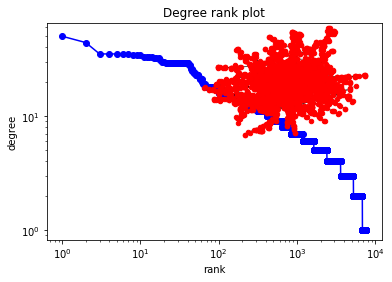

In [53]:
 ### TRY TO PLOT HIST OF DEGREE CENTRALITY FOR GRAPH ###

degree_sequence=sorted(nx.degree(graph).values(),reverse=True) # degree sequence
#print "Degree sequence", degree_sequence
dmax=max(degree_sequence)

plt.loglog(degree_sequence,'b-',marker='o')
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")

# draw graph in inset
plt.axes([0.45,0.45,0.45,0.45])
Gcc=sorted(nx.connected_component_subgraphs(graph), key = len, reverse=True)[0]
pos=nx.spring_layout(Gcc)
plt.axis('off')
nx.draw_networkx_nodes(Gcc,pos,node_size=20)
nx.draw_networkx_edges(Gcc,pos,alpha=0.4)

plt.savefig("degree_histogram.png")
plt.show()
##data rate exceed for full_data

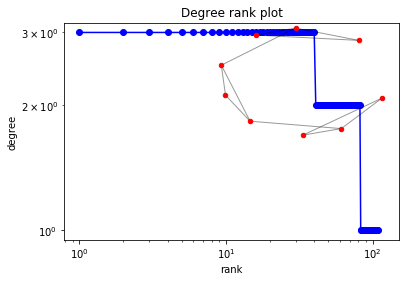

In [54]:
# For the induced subgraph - H
degree_sequence=sorted(nx.degree(H).values(),reverse=True) # degree sequence
#print "Degree sequence", degree_sequence
dmax=max(degree_sequence)

plt.loglog(degree_sequence,'b-',marker='o')
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")

# draw graph in inset
plt.axes([0.45,0.45,0.45,0.45])
Gcc=sorted(nx.connected_component_subgraphs(H), key = len, reverse=True)[0]
pos=nx.spring_layout(Gcc)
plt.axis('off')
nx.draw_networkx_nodes(Gcc,pos,node_size=20)
nx.draw_networkx_edges(Gcc,pos,alpha=0.4)

plt.savefig("degree_histogram_H.png")
plt.show()
##data rate exceed for full_data

Absolute Centrlality histogram


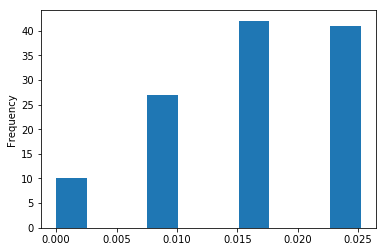

In [55]:
centralityValues = []
for key in degree_centrality.keys():
    centralityValues.append(degree_centrality[key])
print('Absolute Centrlality histogram')
plt.ylabel('Frequency')
plt.hist(centralityValues)
plt.show()

In [59]:
#ABSOLUTE CENTRALITY
centrality={}
s=1.0/(len(graph)-1.0)
centrality=dict((n,d*s) for n,d in H.degree_iter())

In [60]:
#plt.hist(centrality)
centrality

{3326: 0.0002574002574002574,
 3476: 0.00038610038610038604,
 8350: 0.0002574002574002574,
 8352: 0.0002574002574002574,
 8612: 0.0002574002574002574,
 8757: 0.0001287001287001287,
 8857: 0.0001287001287001287,
 8874: 0.00038610038610038604,
 8985: 0.0002574002574002574,
 8987: 0.0002574002574002574,
 8988: 0.0002574002574002574,
 9046: 0.00038610038610038604,
 9068: 0.00038610038610038604,
 9069: 0.00038610038610038604,
 9070: 0.00038610038610038604,
 9308: 0.00038610038610038604,
 9388: 0.0002574002574002574,
 9451: 0.0002574002574002574,
 9503: 0.00038610038610038604,
 9505: 0.0002574002574002574,
 9741: 0.0001287001287001287,
 9771: 0.00038610038610038604,
 9772: 0.0002574002574002574,
 13781: 0.0001287001287001287,
 15924: 0.0001287001287001287,
 16585: 0.00038610038610038604,
 17178: 0.00038610038610038604,
 19285: 0.0002574002574002574,
 19460: 0.0002574002574002574,
 19794: 0.00038610038610038604,
 20199: 0.0001287001287001287,
 20336: 0.0,
 20392: 0.0001287001287001287,
 20405

Absolute Centrlality histogram


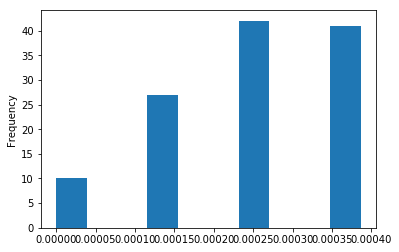

In [61]:
centralityValues = []
for key in centrality.keys():
    centralityValues.append(centrality[key])
print('Absolute Centrlality histogram')
plt.ylabel('Frequency')
plt.hist(centralityValues)
plt.show()

In [62]:
# BETWEENNESS CENTRALITY
betweeness_centrality={}
n=len(H)
denom=n**2 - 3*n + 2
for id_author in centrality.keys():    
    betweeness_centrality[id_author]=centrality[id_author]/denom


In [63]:
betweeness_centrality

{3326: 1.8330740450096666e-08,
 3476: 2.7496110675144997e-08,
 8350: 1.8330740450096666e-08,
 8352: 1.8330740450096666e-08,
 8612: 1.8330740450096666e-08,
 8757: 9.165370225048333e-09,
 8857: 9.165370225048333e-09,
 8874: 2.7496110675144997e-08,
 8985: 1.8330740450096666e-08,
 8987: 1.8330740450096666e-08,
 8988: 1.8330740450096666e-08,
 9046: 2.7496110675144997e-08,
 9068: 2.7496110675144997e-08,
 9069: 2.7496110675144997e-08,
 9070: 2.7496110675144997e-08,
 9308: 2.7496110675144997e-08,
 9388: 1.8330740450096666e-08,
 9451: 1.8330740450096666e-08,
 9503: 2.7496110675144997e-08,
 9505: 1.8330740450096666e-08,
 9741: 9.165370225048333e-09,
 9771: 2.7496110675144997e-08,
 9772: 1.8330740450096666e-08,
 13781: 9.165370225048333e-09,
 15924: 9.165370225048333e-09,
 16585: 2.7496110675144997e-08,
 17178: 2.7496110675144997e-08,
 19285: 1.8330740450096666e-08,
 19460: 1.8330740450096666e-08,
 19794: 2.7496110675144997e-08,
 20199: 9.165370225048333e-09,
 20336: 0.0,
 20392: 9.16537022504833

Betweenness Centrality histogram


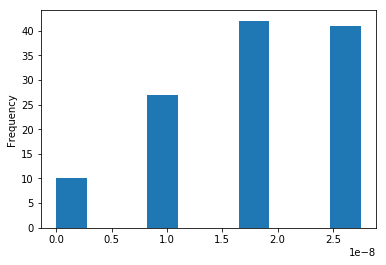

In [64]:
betweenessValues = []
for key in betweeness_centrality.keys():
    betweenessValues.append(betweeness_centrality[key])
print('Betweenness Centrality histogram')
plt.ylabel('Frequency')
plt.hist(betweenessValues)
plt.show()

# Part 2b

In [104]:
authorInp = input("Enter the author id :")

Enter the author id :256176


In [105]:
d = int(input("Enter d: "))

Enter d: 10


In [106]:
subGraph = nx.ego_graph(graph, int(authorInp), radius = d)
#nx.draw(subGraph, pos=nx.spring_layout(subGraph),with_labels = True)
print(nx.info(subGraph))

Name: 
Type: Graph
Number of nodes: 2706
Number of edges: 7657
Average degree:   5.6593


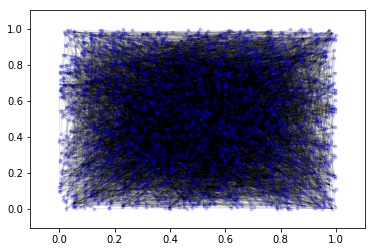

In [109]:
from pylab import show
# create the layout
pos = nx.random_layout(subGraph)
# draw the nodes and the edges (all)
nx.draw_networkx_nodes(subGraph,pos,node_color='b',alpha=0.2,node_size=8)
nx.draw_networkx_edges(subGraph,pos,alpha=0.1)
show()

# Part 3a

In [110]:
import heapq
def dijkstra(graph, source, destination):
    
    """Function for finding weight of the shortest path 
    from a source node to any given node in the graph"""
    
    #prelim is a list with nodes that have been reached but its neigbors were not investigated
    #visited is a set of nodes whose neigbors were investigated
    prelim = [(0, source)]
    visited = set()
    #loop which stops when destination node is achieved and its distance to the source is calculated
    while destination not in visited:
        #heap is used in order to keep list of nodes in a structured manner
        #so that dijkstra's algorithm worked in a fast manner
        (distance, node) = heapq.heappop(prelim)
        #if the node is in visited set then it is fully investigated
        #and only if it is not in the set then operations take place
        if node not in visited:
            visited.add(node)
            #each node neighbouring with the node with minimam distance (from pop)
            #is investigated and distances for each of them are calculated
            #and results are saved in prelim list
            for (edge, dist) in graph[node].items():
                heapq.heappush(prelim, (distance + dist['weight'], edge))
    return distance

In [113]:
dijkstra(graph, 256176, 202882)

8.632570207570208

# Part 3b

In [117]:
import heapq
def dijkstra2(graph, sub_gr):
    
    """Function for finding weight of the shortest path 
    from closest node in sub group to each node in graph"""
    
    #dictionary of a GroupNumber(v) = min{ShortestPath(v,u)} for each node in a graph
    all_dist = {}
    
    #loop which iterates through each node in a given sub group
    #and finds distance to each node in the graph
    for part in sub_gr:
        
        #prelim is a list with nodes that have been reached but its neigbors were not investigated
        #visited is a set of nodes whose neigbors were investigated
        prelim = [(0, part)]
        visited = set()
        
        #loop which is run to check each node's distance 
        #to the given node in the graph subgraph
        while prelim:
            
            #heap is used in order to keep list of nodes in a structured manner
            #so that dijkstra's algorithm worked in a fast manner
            (distance, node) = heapq.heappop(prelim)
            
            #if the node from graph was not added to the all_dist dictionary
            #or if the new distance is shorter
            #node and its distance is added to the dictionary
            if node not in all_dist or all_dist[node] > distance:
                all_dist[node] = distance
            
            #if the node is in visited set then it is fully investigated
            #and only if it is not in the set then operations take place
            if node not in visited:
                visited.add(node)
                
                #each node neighbouring with the node with minimam distance (from pop)
                #is investigated and distances for each of them are calculated
                #and results are saved in prelim list
                for (edge, dist) in graph[node].items():
                    heapq.heappush(prelim, (distance + dist['weight'], edge))
    return all_dist

In [124]:
all_distances = dijkstra2(graph, [256176, 255207, 255394, 20199, 176994])
all_distances # This is a dictionary, where keys are the authors and their values are group numbers

{256176: 0,
 365188: 0.5,
 20793: 0.6842105263157895,
 18263: 0.8,
 365027: 0.8421052631578947,
 269977: 0.85,
 272068: 0.85,
 20994: 0.8947368421052632,
 21131: 0.8947368421052632,
 273893: 0.8947368421052632,
 356527: 0.8947368421052632,
 226733: 0.9090909090909091,
 16617: 0.9473684210526316,
 16618: 0.9473684210526316,
 44955: 0.9473684210526316,
 53221: 0.9473684210526316,
 220576: 0.9473684210526316,
 255654: 0.9473684210526316,
 256177: 0.9473684210526316,
 272067: 0.9473684210526316,
 396772: 0.9473684210526316,
 433893: 0.9473684210526316,
 449967: 0.9473684210526316,
 456091: 0.9473684210526316,
 490807: 0.9473684210526316,
 490865: 0.9473684210526316,
 518711: 0.9473684210526316,
 523302: 0.9473684210526316,
 523303: 0.9473684210526316,
 695406: 0.9473684210526316,
 255275: 0.95,
 225947: 0.9523809523809523,
 255328: 0.9523809523809523,
 490729: 0.9545454545454546,
 19211: 0.96,
 114821: 0.9615384615384616,
 39449: 1.4090909090909092,
 364863: 1.4090909090909092,
 255327: 1.